In [1]:
import pandas as pd
disaster=pd.read_csv("sample_submission.csv")
disaster

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [2]:
#properties of dataset
disaster.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [3]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
 1   target  3263 non-null   int64
dtypes: int64(2)
memory usage: 51.1 KB


In [4]:
disaster.columns

Index(['id', 'target'], dtype='object')

In [5]:
disaster.size

6526

In [6]:
disaster.shape

(3263, 2)

In [7]:
 #read files
test_df = pd.read_csv("test.csv")
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [8]:
train_df = pd.read_csv("train.csv")
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
#clean data
import re
import nltk
from nltk.corpus import stopwords

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def remove_URL(text):
    return re.sub(r"https://t.co", "", text)
def remove_another(text):
    return re.sub('[^\x00-\x7f]','', text)
def alpha_only(text):
    data = []
    for i in text:    
        if i.isalpha():
            data.append(i)
    return data
stop = stopwords.words('english')

In [14]:
import numpy as np

In [15]:
train_df["text_clean"] = train_df["text"].apply(lambda x: x.lower())
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_another(x))
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_URL(x))
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: x.split())
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: alpha_only(x))
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: np.array([word for word in x if word not in stop]))
train_df["text_clean_2"] = train_df["text_clean"].apply(lambda x: " ".join(x))

In [16]:
display(train_df.head())

,id,keyword,location,text,target,text_clean,text_clean_2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, may, allah, forgive, us]",deeds reason may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, canada]",forest fire near la ronge canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, notified, evacuation, shelt...",residents asked notified evacuation shelter pl...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, evacuation, orders, california]",people receive evacuation orders california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, smoke, pours, school]",got sent photo ruby smoke pours school


In [17]:
test_df["text_clean"] = test_df["text"].apply(lambda x: x.lower())
test_df["text_clean"] = test_df["text_clean"].apply(lambda x: remove_another(x))
test_df["text_clean"] = test_df["text_clean"].apply(lambda x: remove_URL(x))
test_df["text_clean"] = test_df["text_clean"].apply(lambda x: x.split())
test_df["text_clean"] = test_df["text_clean"].apply(lambda x: alpha_only(x))
test_df["text_clean"] = test_df["text_clean"].apply(lambda x: np.array([word for word in x if word not in stop]))
test_df["text_clean_2"] = train_df["text_clean"].apply(lambda x: " ".join(x))

In [18]:
display(test_df.head())

,id,keyword,location,text,text_clean,text_clean_2
0,0,NaN,NaN,Just happened a terrible car crash,"[happened, terrible, car, crash]",deeds reason may allah forgive us
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, different, stay, safe]",forest fire near la ronge canada
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, geese, fleeing, across, c...",residents asked notified evacuation shelter pl...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,[apocalypse],people receive evacuation orders california
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, china, taiwan]",got sent photo ruby smoke pours school


# Sentiment Extaction-Analysis EDA

In [19]:
#count all words
all_text = " ".join(train_df["text_clean_2"].values)
all_words = all_text.split()
all_words = set(all_words)
numwords = len(all_words)

In [20]:
#convert text to vector
x_train = train_df["text_clean_2"]
y_train = train_df["target"]
x_test = test_df["text_clean_2"]

In [21]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import train_test_split

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='target', ylabel='count'>

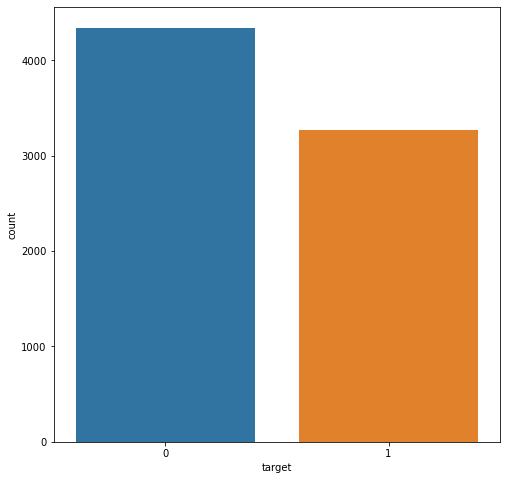

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(x='target',data=train_df)

In [27]:
from collections import Counter
train_df['temp_list'] = train_df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,2575
1,a,1845
2,to,1805
3,in,1757
4,of,1722
5,and,1302
6,I,1197
7,for,820
8,is,814
9,on,773


In [34]:
real_disaster = train_df[train_df['target']== 0]
fake_disaster = train_df[train_df['target']== 1]

In [35]:
top = Counter([item for sublist in real_disaster['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive = temp_positive.iloc[0:,:]
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,the,1524
1,a,1115
2,to,1099
3,I,938
4,and,840
5,of,834
6,in,720
7,you,529
8,is,512
9,for,452


In [41]:
top = Counter([item for sublist in fake_disaster['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Blues')

,Common_words,count
1,in,1037
2,of,888
3,a,730
4,to,706
5,and,462
6,-,389
7,on,386
8,for,368
9,is,302
10,at,273


In [52]:
real_disaster

,id,keyword,location,text,target,text_clean,text_clean_2,temp_list
15,23,NaN,NaN,What's up man?,0,[],,"[What's, up, man?]"
16,24,NaN,NaN,I love fruits,0,"[love, fruits]",love fruits,"[I, love, fruits]"
17,25,NaN,NaN,Summer is lovely,0,"[summer, lovely]",summer lovely,"[Summer, is, lovely]"
18,26,NaN,NaN,My car is so fast,0,"[car, fast]",car fast,"[My, car, is, so, fast]"
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,[],,"[What, a, goooooooaaaaaal!!!!!!]"
...,...,...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,"[great, atmosphere, british, lion, gig, hearing]",great atmosphere british lion gig hearing,"[@engineshed, Great, atmosphere, at, the, Brit..."
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,"[words, wrecked, stock, cnbc]",words wrecked stock cnbc,"[Cramer:, Iger's, 3, words, that, wrecked, Dis..."
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,"[boxes, ready, exploding, kittens, finally, ga...",boxes ready exploding kittens finally gameofki...,"[These, boxes, are, ready, to, explode!, Explo..."
7587,10841,NaN,NaN,Sirens everywhere!,0,[sirens],sirens,"[Sirens, everywhere!]"


# classification of tweets for disaster management

In [53]:
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize,WhitespaceTokenizer,TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re

In [56]:
import numpy as np # linear algebra
import pandas as pd

In [57]:
train_df.isnull().sum().sort_values(ascending=False)

location        2533
keyword           61
id                 0
text               0
target             0
text_clean         0
text_clean_2       0
temp_list          0
dtype: int64

In [59]:
pp=np.array([train_df.text[train_df.target==1].count(),train_df.text[train_df.target==0].count()]).reshape((1,2))
label_count=pd.DataFrame(pp,index=["train_df_count"],columns=['positive(1)','negative(0)'])
label_count.style.set_properties(**{'color':'green',
                                    'border':'2px solid black !important'}).set_table_styles([
                                    {'selector':'th','props':[('border','2px black solid !important')]
                                    }])

,positive(1),negative(0)
train_df_count,3271,4342


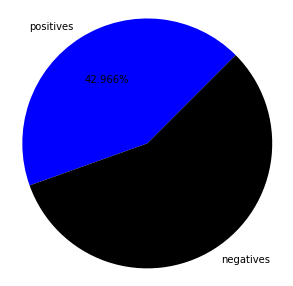

In [64]:
fig=plt.figure(figsize=(5,5))
labels=["positives","negatives"]
sizes=[train_df.text[train_df.target==1].count(),train_df.text[train_df.target==0].count()]
plt.pie(sizes,labels=labels,autopct="%1.3f%%",colors=['blue','black'],shadow=False,startangle=45)
plt.axis('equal')
plt.show()

In [65]:
#Lowercasing each and every word to avoid unneccessary computations
train_df['text']=train_df['text'].apply(lambda x:x.lower())
test_df['text']=test_df['text'].apply(lambda x:x.lower())

In [67]:
#Splitting the Dataset into Train and Validation sets

x_train,x_val,y_train,y_val=train_test_split(train_df.iloc[:,:-1],train_df['target'].values,test_size=0.20,random_state=0)

In [69]:
print(x_train.shape)
print(x_val.shape)
print(test_df.shape)

(6090, 7)
(1523, 7)
(3263, 6)


In [70]:
x_train

,id,keyword,location,text,target,text_clean,text_clean_2
1386,1999,bush%20fires,NaN,ted cruz fires back at jeb &amp; bush: ûïwe l...,0,"[ted, cruz, fires, back, jeb, lose, republican...",ted cruz fires back jeb lose republicans like jeb
4048,5751,forest%20fires,NaN,this is the first year the forest service spen...,1,"[first, year, forest, service, spent, half, an...",first year forest service spent half annual bu...
3086,4428,electrocute,NaN,@lightseraphs pissed at you and could have the...,0,"[pissed, could, pikachu, electrocute]",pissed could pikachu electrocute
272,396,apocalypse,ColoRADo,i'm gonna fight taylor as soon as i get there.,0,"[gonna, fight, taylor, soon, get]",gonna fight taylor soon get
7462,10678,wounds,"Tampa, FL",@nicolaclements4 iûªm not sure that covering ...,0,"[im, sure, covering, head, wounds, scabs, solu...",im sure covering head wounds scabs solution
...,...,...,...,...,...,...,...
4931,7025,mayhem,"Manavadar, Gujarat",they are the real heroes... rip brave hearts.....,0,"[real, rip, brave]",real rip brave
3264,4689,engulfed,USA,car engulfed in flames backs up traffic at par...,1,"[car, engulfed, flames, backs, traffic, parley...",car engulfed flames backs traffic parleys summit
1653,2388,collapsed,"Alexandria, Egypt.",great british bake off's back and dorret's cho...,1,"[great, british, bake, back, chocolate, gateau...",great british bake back chocolate gateau colla...
2607,3742,destroyed,USA,black eye 9: a space battle occurred at star o...,0,"[black, eye, space, battle, occurred, star, in...",black eye space battle occurred star involving...


# Building Naive Bayes model from scratch which can be used as a Baseline model.

In [71]:
class Naive_Bayes:
    def __init__(self,n_pos,n_neg):
        self.n_pos=n_pos
        self.n_neg=n_neg
        self.total_pos_word_occurrence=0
        self.total_neg_word_occurrence=0
        self.unique_words=0
        self.vocabulary={}
        
    def vocab_builder(self,text,sentiment):
        for word in text.split(" "):
            if word not in self.vocabulary.keys():
                self.vocabulary[word]=[0,0]
                if sentiment==0:
                    self.vocabulary[word][0]=1
                else:
                    self.vocabulary[word][1]=1
            else:
                self.vocabulary[word][sentiment]+=1
                
    def laplacian_smoothing(self):
        unique_words=set()
        for word in self.vocabulary.keys():
            #calculating the total no. of positive and negative occurences of words
            self.total_pos_word_occurrence+=self.vocabulary[word][1]
            self.total_neg_word_occurrence+=self.vocabulary[word][0]
            #calculating the total no. of unique words in the dictionary
            unique_words.add(word)
        self.unique_words=len(unique_words)
        for word in self.vocabulary.keys():
            self.vocabulary[word][0]=(self.vocabulary[word][0]+1)/(self.total_neg_word_occurrence+self.unique_words)
            self.vocabulary[word][1]=(self.vocabulary[word][1]+1)/(self.total_pos_word_occurrence+self.unique_words)
    
    
    def log_likelihood(self):
        for word in self.vocabulary.keys():
            self.vocabulary[word].append(np.log(self.vocabulary[word][1]/self.vocabulary[word][0]))
        
    def train(self,train_data,y_label):
        for tweet,label in zip(train_data['text'],y_label):
            self.vocab_builder(tweet,label)
        self.laplacian_smoothing()
        self.log_likelihood()
        '''for key in list(self.vocabulary.keys())[:20]:
            print(self.vocabulary[key])'''
            
    def predict(self,x_val,y_val):
        #print(x_val.shape,y_val.shape)
        correct_pred=0
        total_pred=x_val.shape[0]
        for i in range(x_val.shape[0]):
            document=x_val.iloc[i,:]['text']
            lst_of_words=document.split(" ")
            #new_word=False
            pred=0
            document_prob=0
            for word in lst_of_words:
                if word in self.vocabulary.keys():
                    document_prob+=self.vocabulary[word][2]
            if document_prob>=0:
                pred=1
            if pred==y_val[i]:
                correct_pred+=1
        acc=correct_pred/total_pred
        print("Accuracy:{:.3f}".format(acc))
        
    def test(self,document):
        pred=0
        document_prob=0
        lst_of_words=document.split(" ")
        for word in lst_of_words:
            if word in self.vocabulary.keys():
                document_prob+=self.vocabulary[word][2]
        if document_prob>=0:
            pred=1
        return pred
            

n_positive=y_train[y_train==1].sum()
n_negative=y_train.shape[0]-n_positive

NB=Naive_Bayes(n_positive,n_negative)
NB.train(x_train,y_train)

In [72]:
NB.predict(x_val,y_val)

Accuracy:0.794


# Applying the TF-IDF transformer to get a vector 

In [76]:
tf_idfvec=TfidfVectorizer(decode_error=True,use_idf=True,lowercase=True,min_df=2)
train=tf_idfvec.fit_transform(x_train.text.values.astype('U'))    
val=tf_idfvec.transform(x_val.text.values.astype('U'))
#test_tfidf=TfidfVectorizer(decode_error=True,use_idf=True,lowercase=True,min_df=2)
test=tf_idfvec.transform(test_df.text.values.astype('U'))

In [77]:
print(train.shape)
print(val.shape)
print(test.shape)

(6090, 5671)
(1523, 5671)
(3263, 5671)
